In [3]:
import pandas as pd
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from spacy.lang.en.stop_words import STOP_WORDS


nlp = spacy.load('en')
list_QA = ["performance", "compatibility", "usability", "reliability", "security", "maintainability", "portability"]



In [4]:
def show_word_counts(list_words,nb_word = 20,title="Most Common Word",path_svg=None):
    word_counts = Counter(list_words)
    common_words = [word[0] for word in word_counts.most_common(nb_word)]
    common_counts = [word[1] for word in word_counts.most_common(nb_word)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=common_words, y=common_counts)
    plt.title(title)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=16)
    if(title):
        plt.savefig("./svg/test_3/"+title+".svg", format="svg")

    print("Moyenne occurence par mot : ",sum(common_counts)/len(common_counts))
    plt.show()

punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in STOP_WORDS and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [5]:
path = "../../data/processed/train_data_US_QA.csv"
df = pd.read_csv(path)
path = "../../data/processed/test_data_US_QA.csv"
df2 = pd.read_csv(path)

df = pd.concat([df,df2])

df["US"] = df["User story"]
dic_global_data = {}
for qa in list_QA:
    dic_global_data[qa] = df[df[qa]==1]



In [6]:
#We collect all data obs in one dict
path = "../../data/saved_obs_sent/batch_32/"
name_global = "batch_32"

type_dataset = ["train","test"]
type_pred = ["fp","tp","tn","fn"]
list_QA = ["performance", "compatibility", "usability", "reliability", "security", "maintainability", "portability"]

output_US_pred = {}

for td in type_dataset:
    output_US_pred[td] = {}
    for tp in type_pred:
        output_US_pred[td][tp] = {}
        name_file = td+"_"+tp+"_"+name_global+".csv"
        df = pd.read_csv(path + name_file)
        for qa in list_QA:
            try:
                output_US_pred[td][tp][qa] = df[df["label"] == qa]
            except KeyError:
                output_US_pred[td][tp][qa] = []

In [7]:
def show_clean_word_counts(df,nb_word=10,title ="Most Common Word"):
    US = [text for text in df['US']]
    US_clean = cleanup_text(US)
    US_clean = ' '.join(US_clean).split()
    US_clean = [us for us in US_clean if us != "want"]
    show_word_counts(US_clean,nb_word=10,title =title)
    
def show_clean_word_counts_dic(dic,td,tp,qa):
    show_clean_word_counts(dic[td][tp][qa],title="Most Common Word in "+tp.upper()+ " for "+qa.upper()+" in dataset "+td)




## performance

Moyenne occurence par mot :  16.3


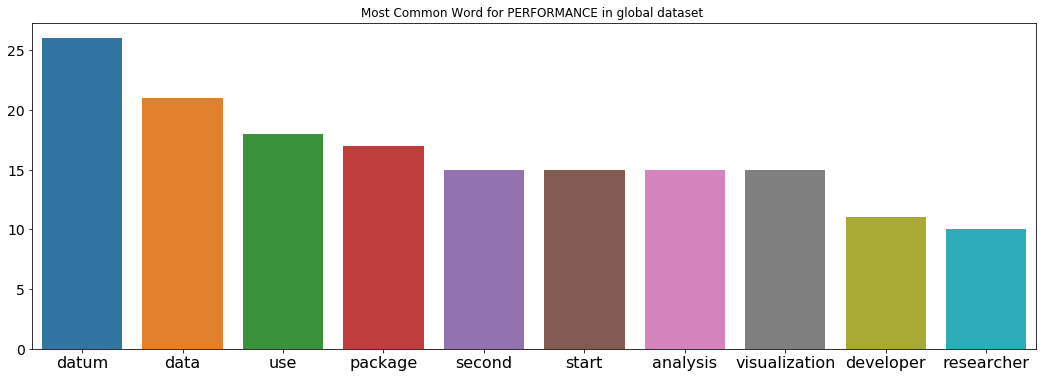

Moyenne occurence par mot :  12.4


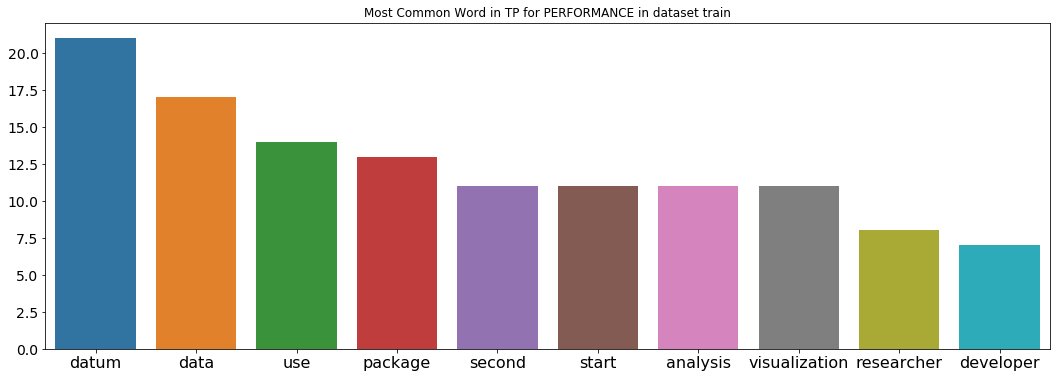

Moyenne occurence par mot :  3.6


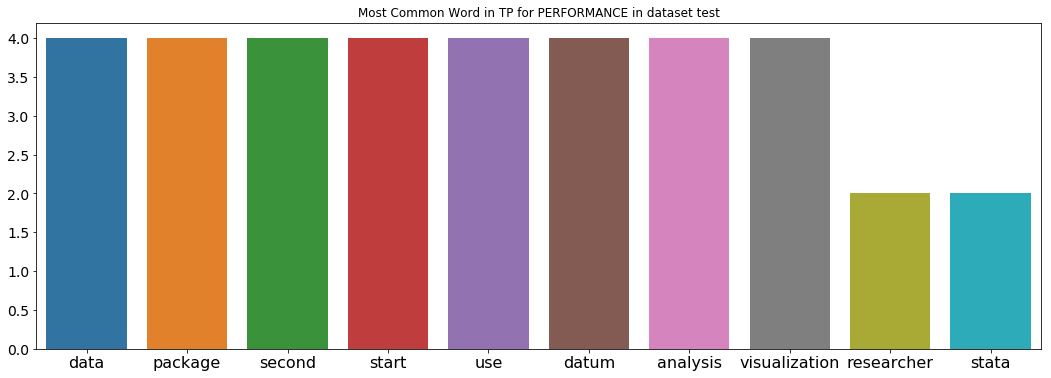

Moyenne occurence par mot :  1.25


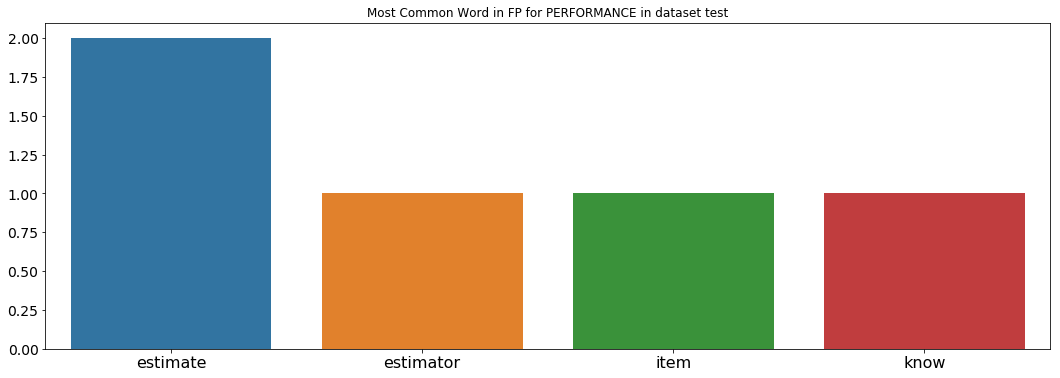

Moyenne occurence par mot :  2.0


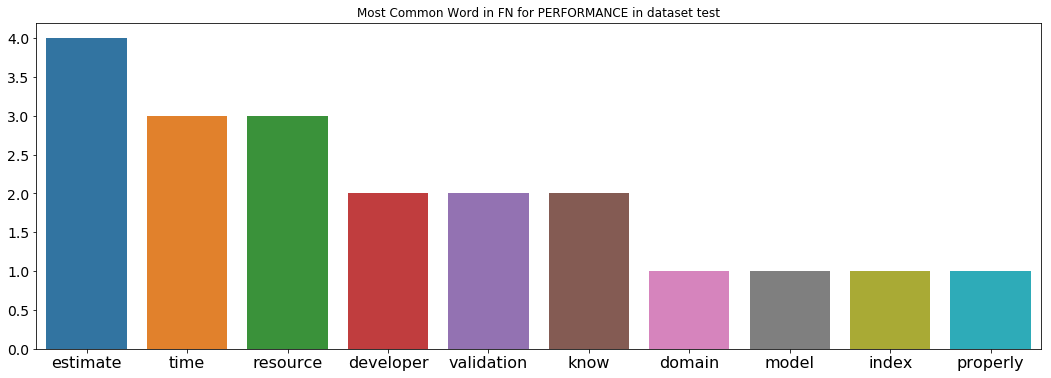

In [8]:
QA_look = "performance"
show_clean_word_counts(dic_global_data[QA_look],title="Most Common Word for "+QA_look.upper()+" in global dataset ")
show_clean_word_counts_dic(output_US_pred,"train","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fn",QA_look)

## compatibility

Moyenne occurence par mot :  42.2


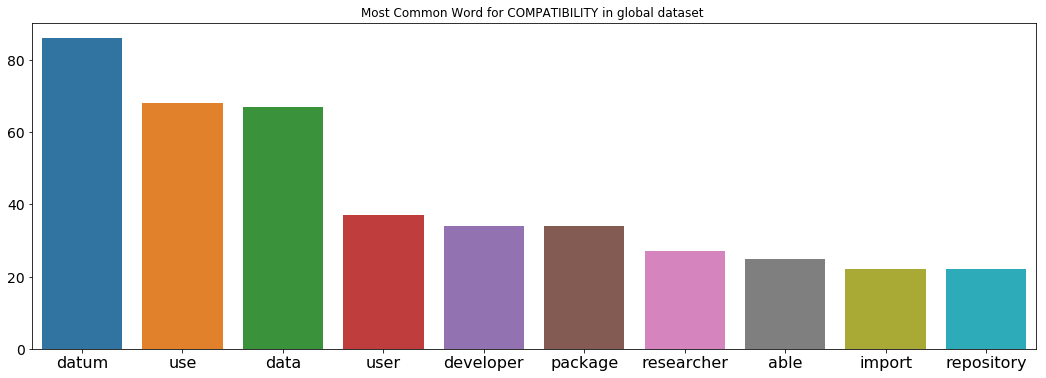

Moyenne occurence par mot :  28.8


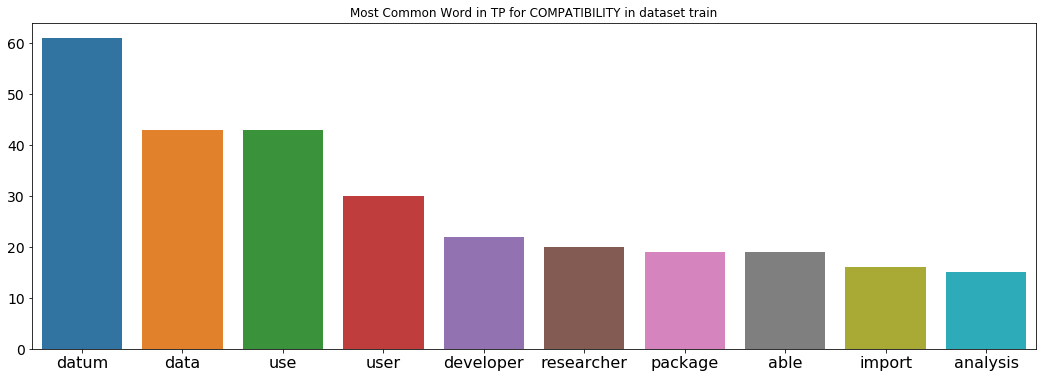

Moyenne occurence par mot :  9.6


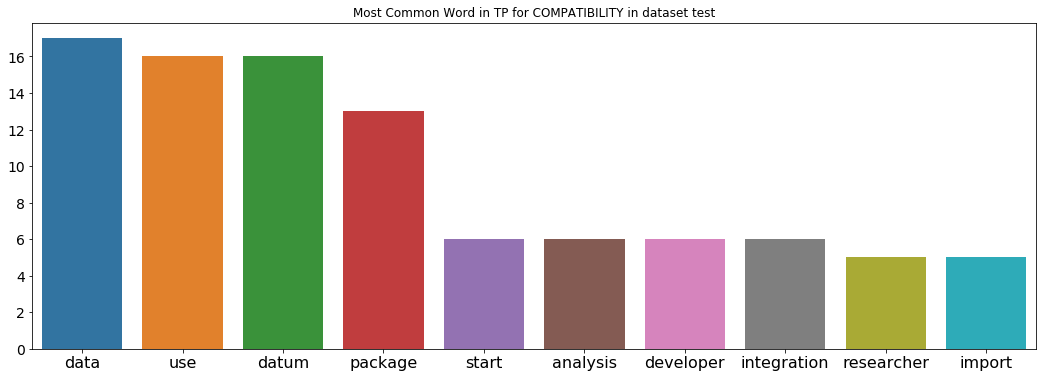

Moyenne occurence par mot :  3.5


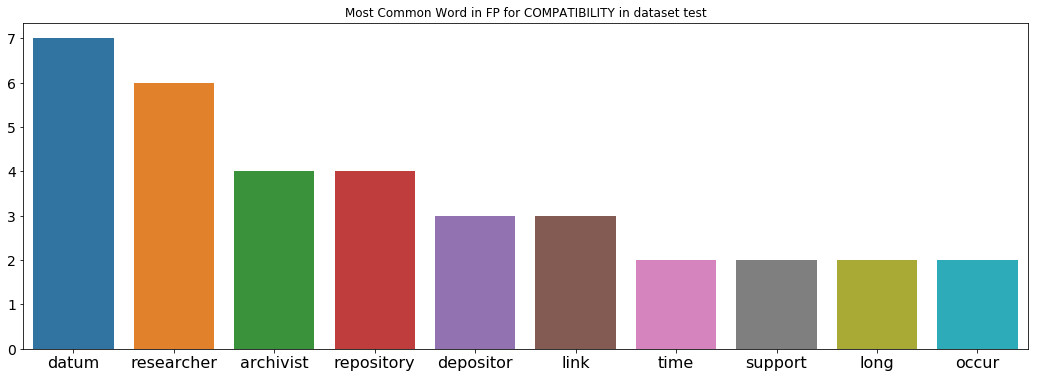

Moyenne occurence par mot :  5.9


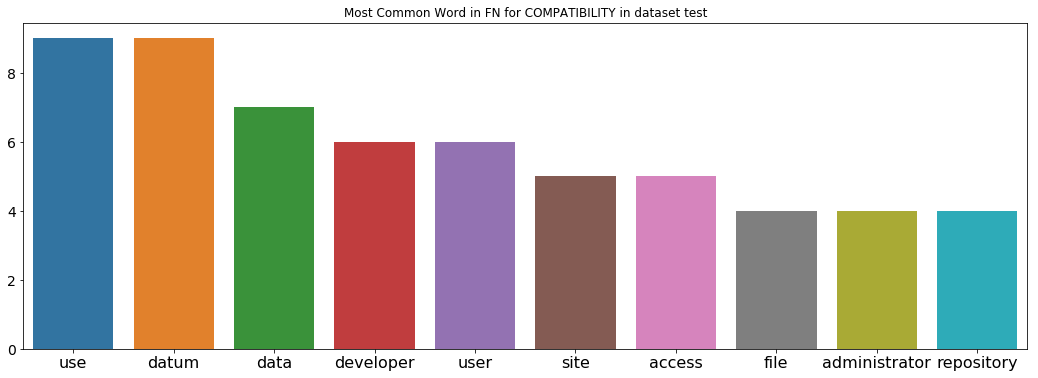

In [9]:
QA_look = "compatibility"
show_clean_word_counts(dic_global_data[QA_look],title="Most Common Word for "+QA_look.upper()+" in global dataset ")
show_clean_word_counts_dic(output_US_pred,"train","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fn",QA_look)

## usability

Moyenne occurence par mot :  14.3


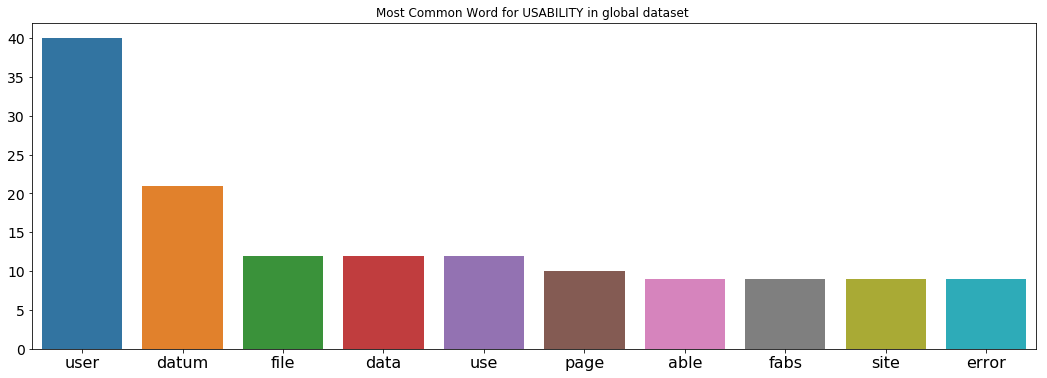

Moyenne occurence par mot :  10.6


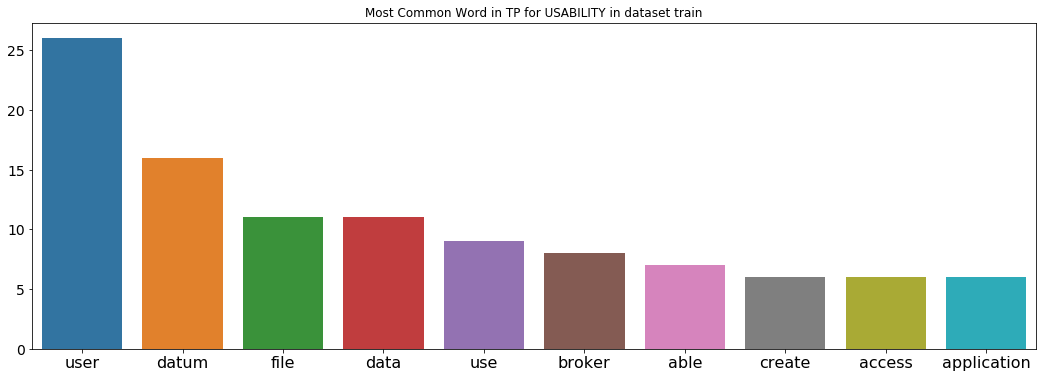

Moyenne occurence par mot :  3.6


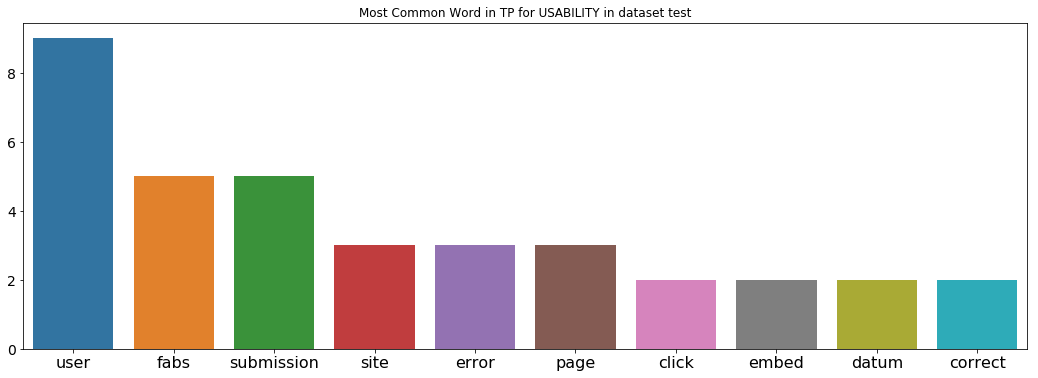

Moyenne occurence par mot :  1.2


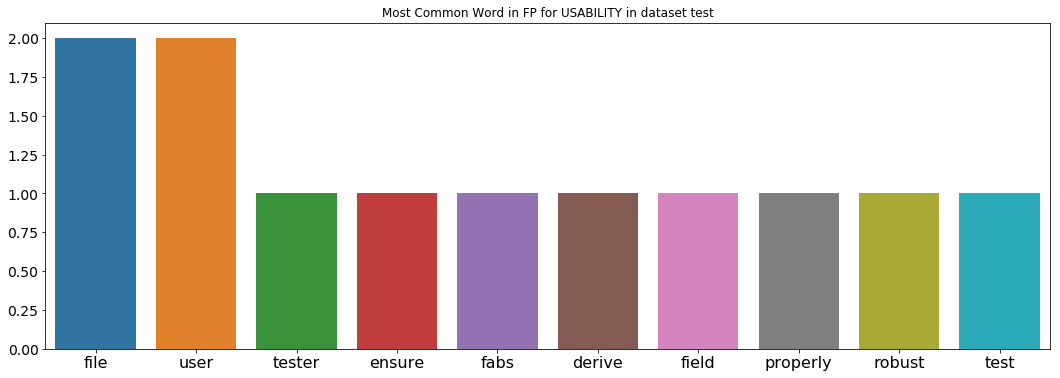

Moyenne occurence par mot :  2.4


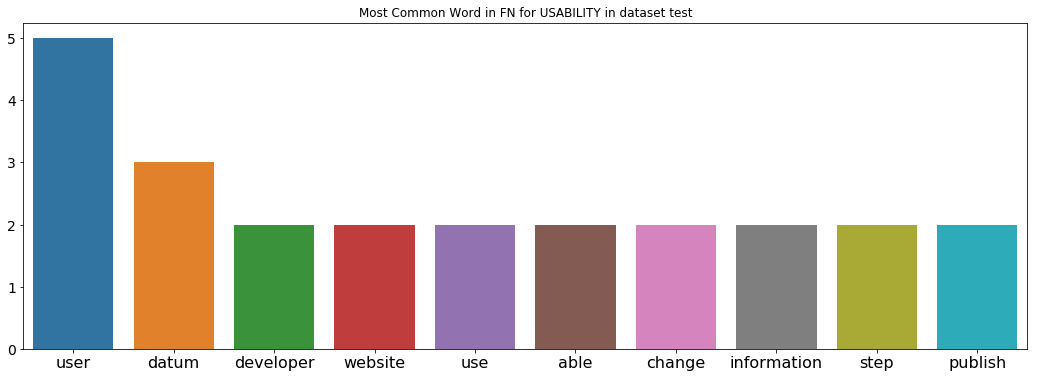

In [10]:
QA_look = "usability"
show_clean_word_counts(dic_global_data[QA_look],title="Most Common Word for "+QA_look.upper()+" in global dataset ")
show_clean_word_counts_dic(output_US_pred,"train","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fn",QA_look)

## reliability

Moyenne occurence par mot :  8.6


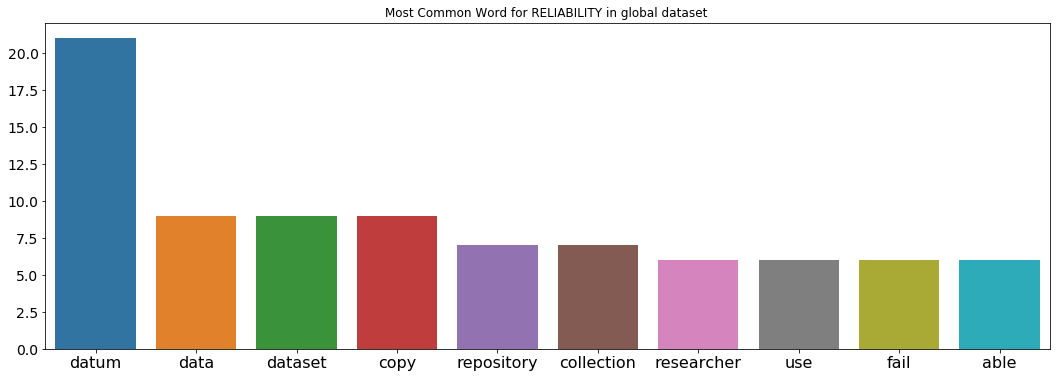

Moyenne occurence par mot :  6.8


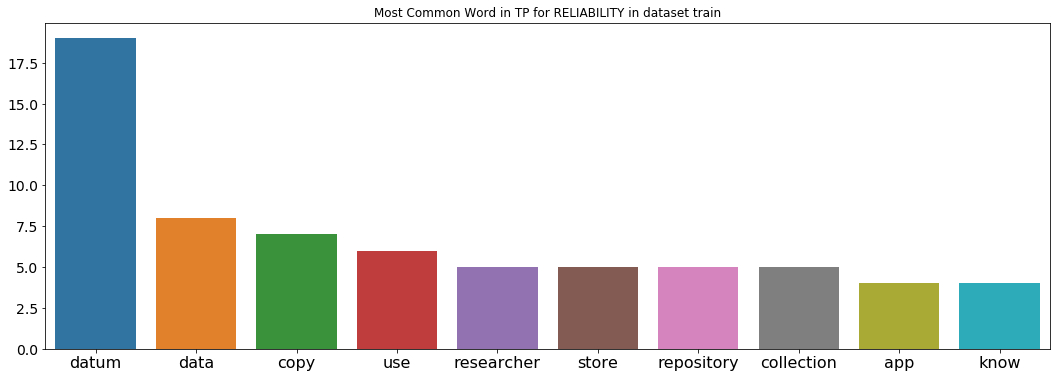

Moyenne occurence par mot :  1.2


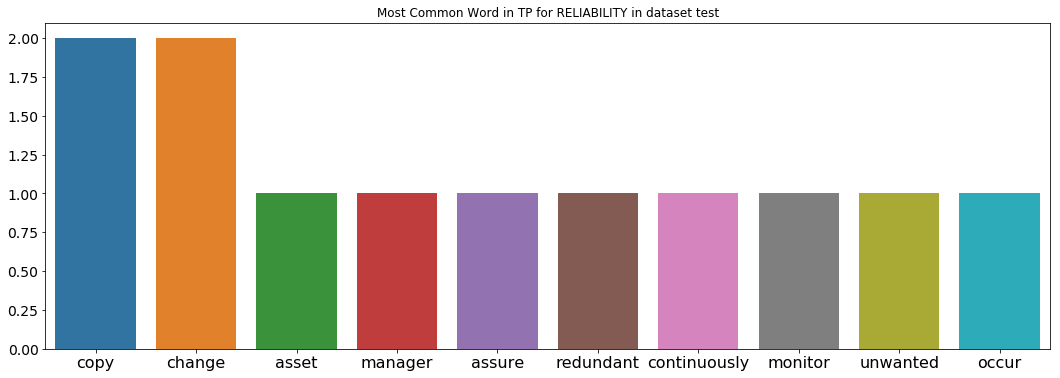

Moyenne occurence par mot :  1.7


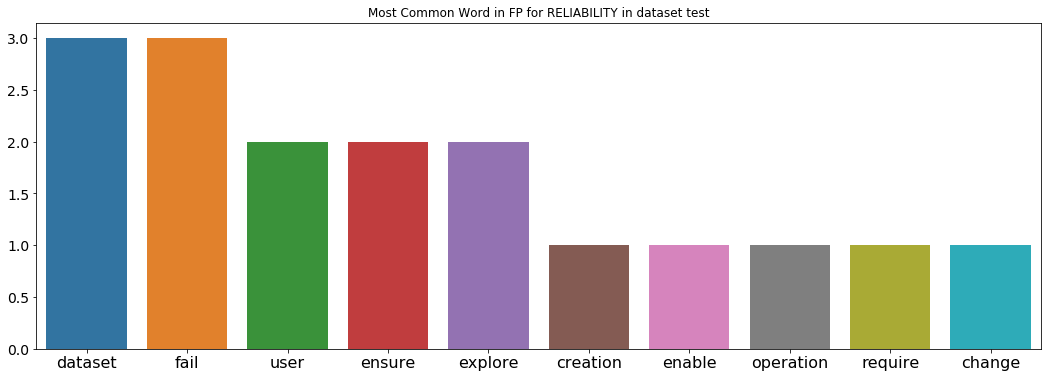

Moyenne occurence par mot :  2.6


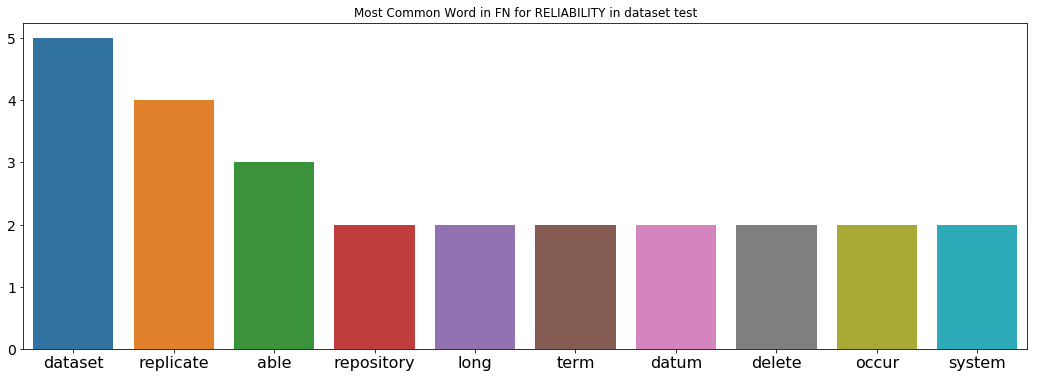

In [11]:
QA_look = "reliability"
show_clean_word_counts(dic_global_data[QA_look],title="Most Common Word for "+QA_look.upper()+" in global dataset ")
show_clean_word_counts_dic(output_US_pred,"train","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fn",QA_look)

## security

Moyenne occurence par mot :  21.3


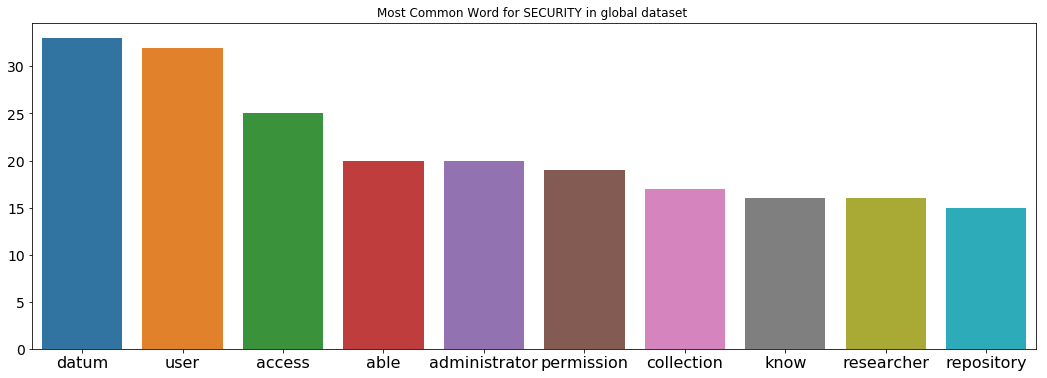

Moyenne occurence par mot :  15.3


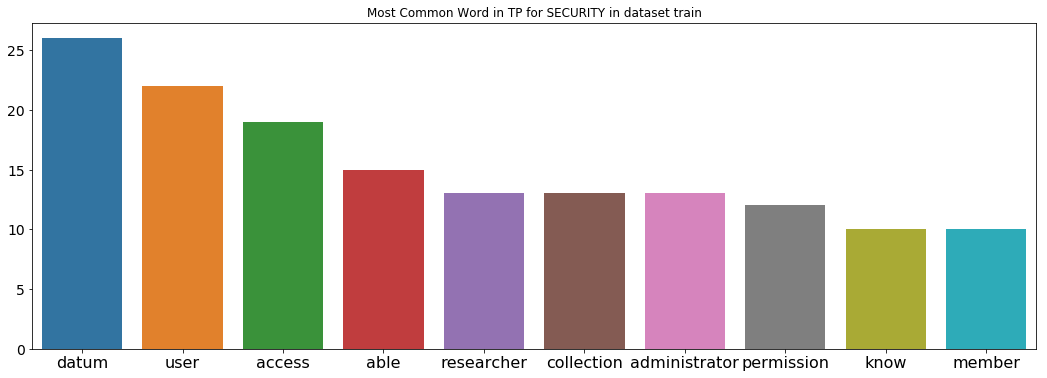

Moyenne occurence par mot :  4.1


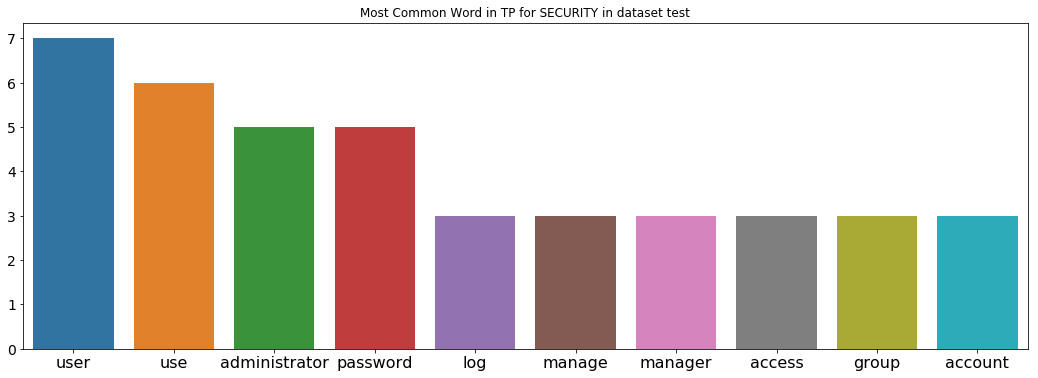

Moyenne occurence par mot :  1.6


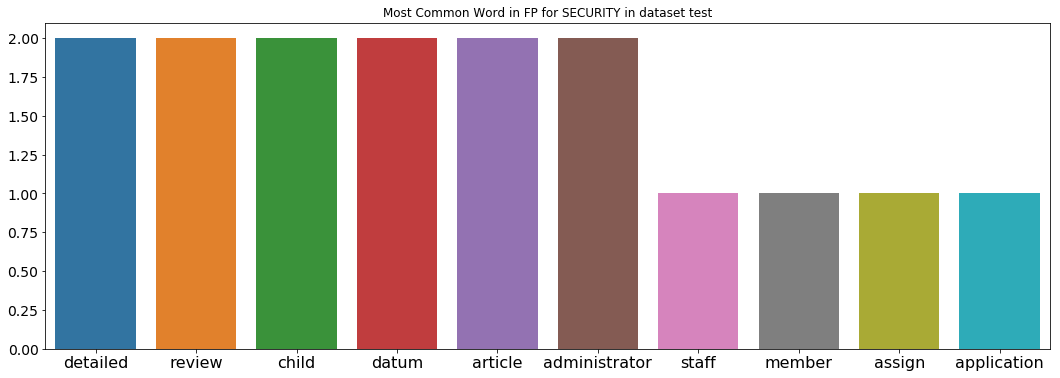

Moyenne occurence par mot :  4.3


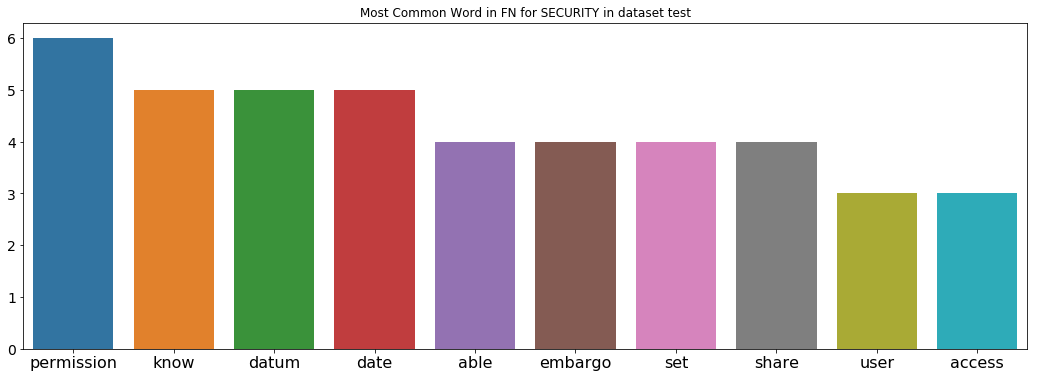

In [12]:
QA_look = "security"
show_clean_word_counts(dic_global_data[QA_look],title="Most Common Word for "+QA_look.upper()+" in global dataset ")
show_clean_word_counts_dic(output_US_pred,"train","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fn",QA_look)

## maintainability

Moyenne occurence par mot :  23.5


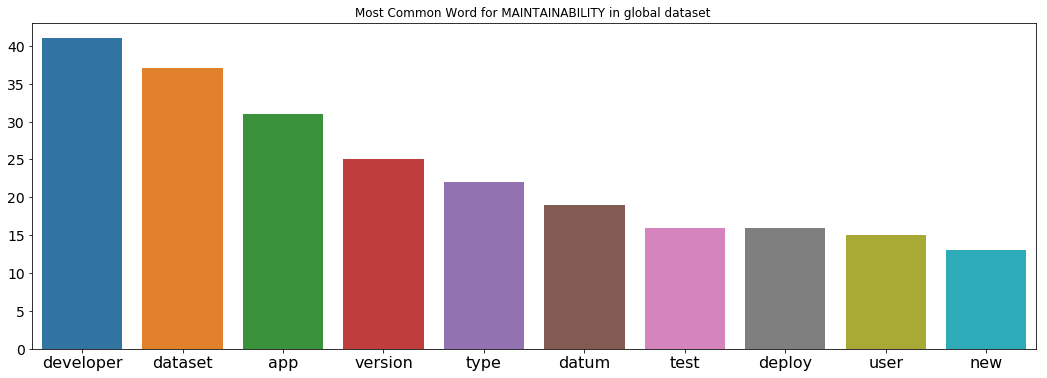

Moyenne occurence par mot :  19.3


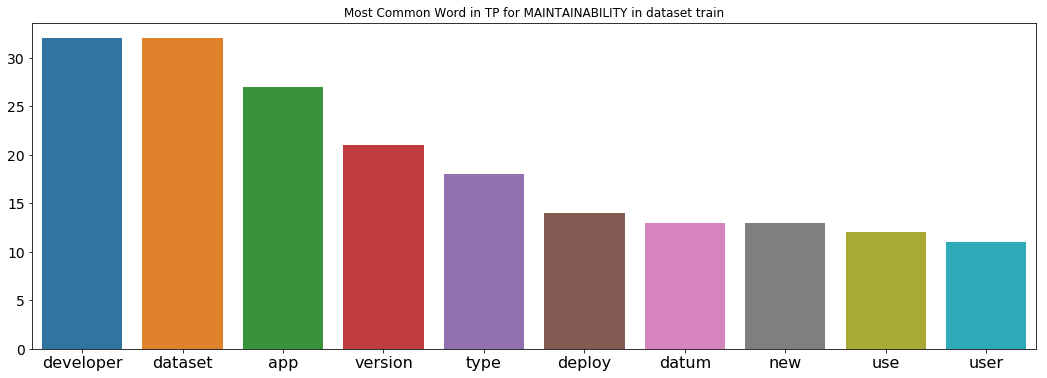

Moyenne occurence par mot :  3.0


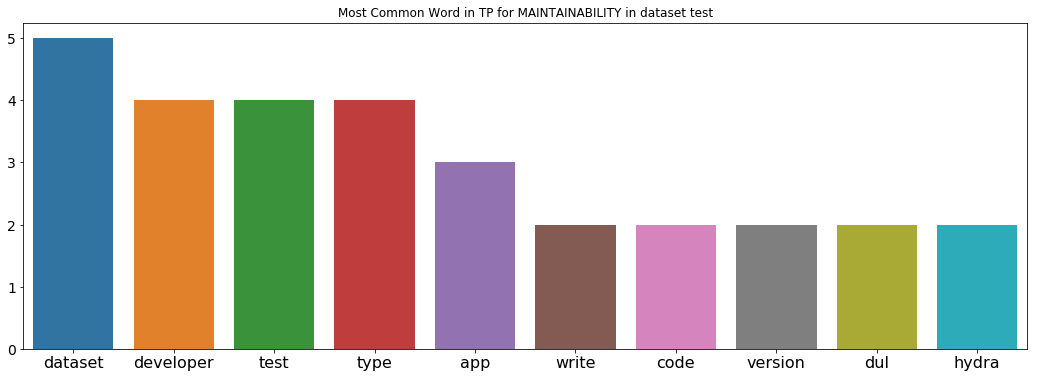

Moyenne occurence par mot :  2.2


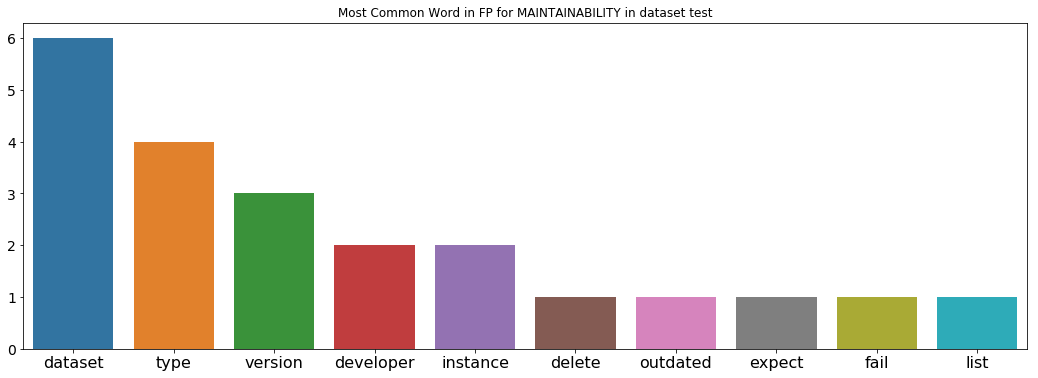

Moyenne occurence par mot :  4.1


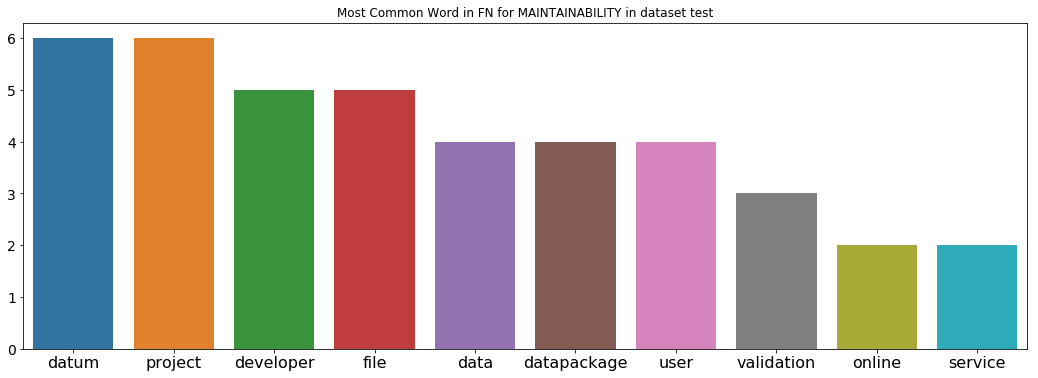

In [13]:
QA_look = "maintainability"
show_clean_word_counts(dic_global_data[QA_look],title="Most Common Word for "+QA_look.upper()+" in global dataset ")
show_clean_word_counts_dic(output_US_pred,"train","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fn",QA_look)

## portability

Moyenne occurence par mot :  11.1


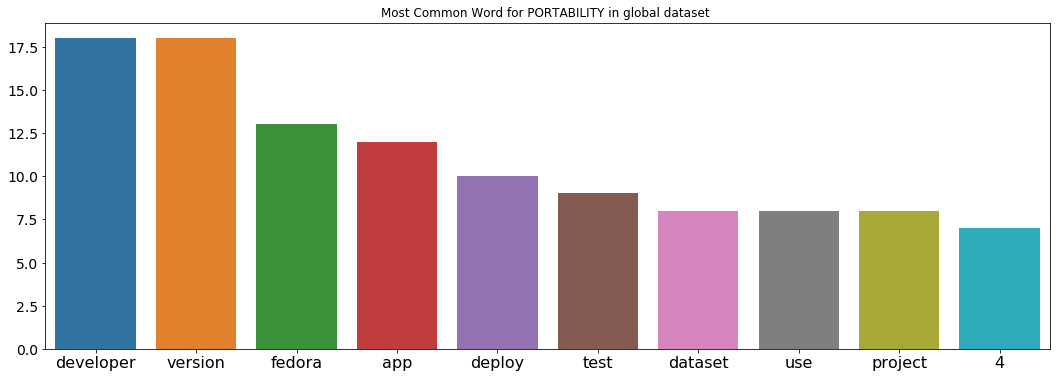

Moyenne occurence par mot :  9.4


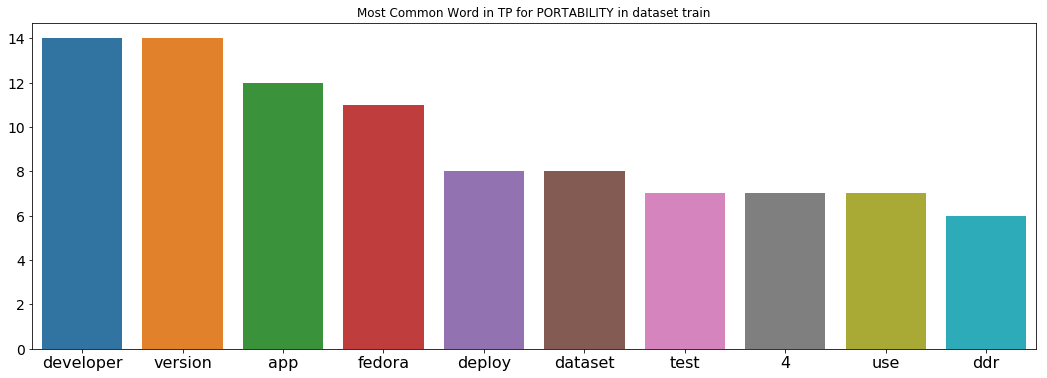

Moyenne occurence par mot :  2.0


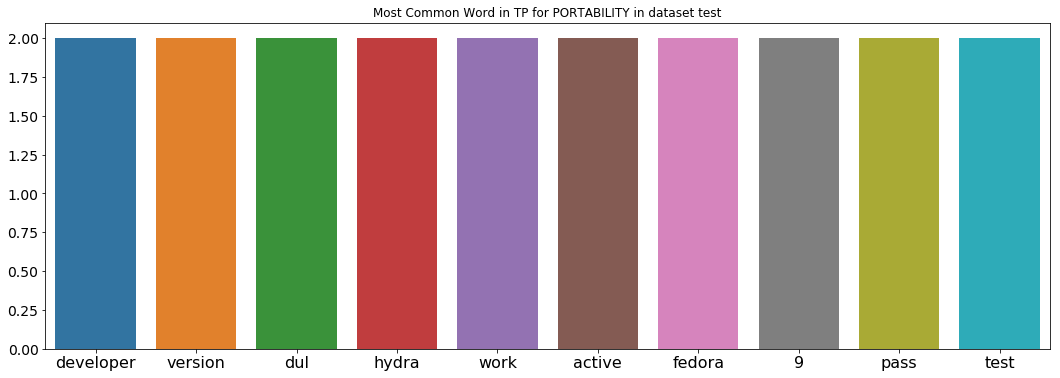

Moyenne occurence par mot :  1.5


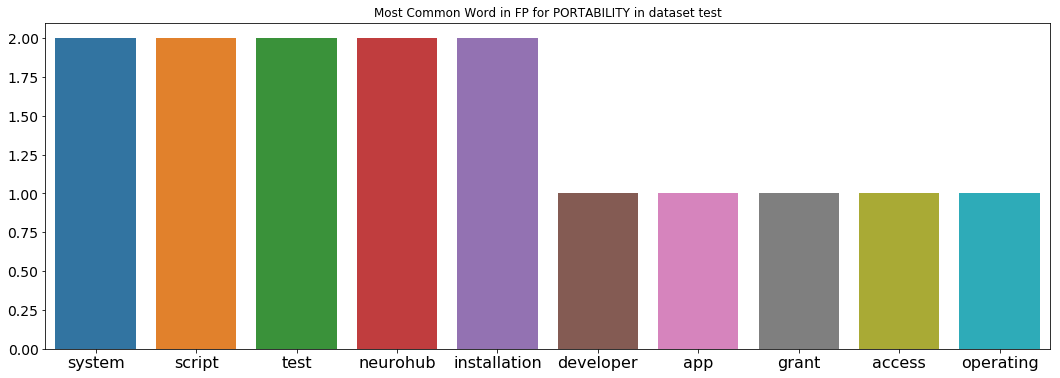

Moyenne occurence par mot :  3.0


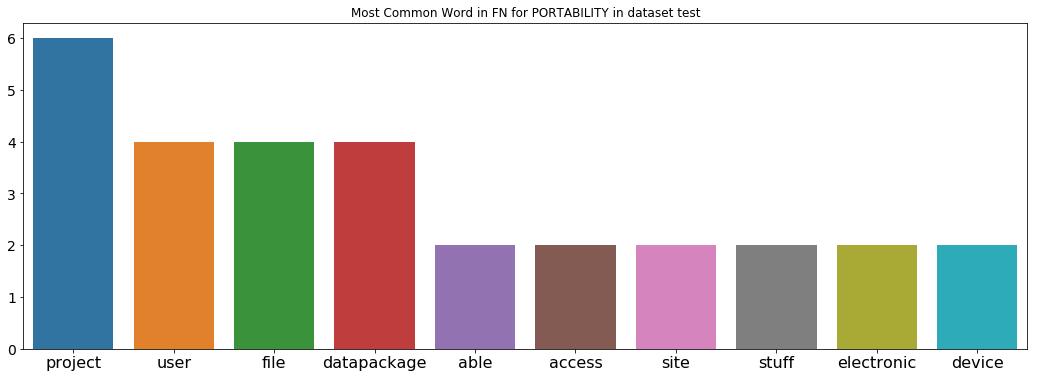

In [14]:
QA_look = "portability"
show_clean_word_counts(dic_global_data[QA_look],title="Most Common Word for "+QA_look.upper()+" in global dataset ")
show_clean_word_counts_dic(output_US_pred,"train","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","tp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fp",QA_look)
show_clean_word_counts_dic(output_US_pred,"test","fn",QA_look)